## City of Los Angeles Public Library Locations

My group and I have decided to research library accessibility in LA for households without cars. This week I am mapping out the locations of the City of Los Angeles Public Library while my other group members look at sociodemographic factors.

I start by uploading the libraries I will need to map the data.

In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import contextily as ctx

Next I import the dataset I downloaded from LA Geohub containing City of LA Public Library locations. I removed libraries outside of this system beforehand in Excel.

In [4]:
libraries = pd.read_csv('Libraries.csv')

I check the data frame using the .info() command.

In [6]:
libraries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OBJECTID   72 non-null     float64
 1   Name       73 non-null     object 
 2   City       73 non-null     object 
 3   zip        73 non-null     int64  
 4   latitude   73 non-null     float64
 5   longitude  73 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.5+ KB


I see that there is one null cell under OBJECTID. There was one library location missing from the dataset I uploaded, so I added it to the .CSV file without an OBJECTID. Next I will take a closer look at the dataframe.

In [8]:
libraries.head()

,OBJECTID,Name,City,zip,latitude,longitude
0,60845.0,Los Angeles Public Library - Central Library,Los Angeles,90071,34.050629,-118.254911
1,60708.0,Los Angeles Public Library - Alma Reaves Woods...,Los Angeles,90002,33.943847,-118.246428
2,60838.0,Los Angeles Public Library - Angeles Mesa Branch,Los Angeles,90043,33.994886,-118.322559
3,60830.0,Los Angeles Public Library - Arroyo Seco Regio...,Los Angeles,90042,34.113870,-118.186319
4,60766.0,Los Angeles Public Library - Ascot Branch,Los Angeles,90003,33.974560,-118.274473


This file has separate latitude and longitude columns, so next I will convert the data into a geodataframe.

In [10]:
geolibraries = gpd.GeoDataFrame(libraries, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(libraries.longitude, libraries.latitude))

In [15]:
libraries.head()

,OBJECTID,Name,City,zip,latitude,longitude,geometry
0,60845.0,Los Angeles Public Library - Central Library,Los Angeles,90071,34.050629,-118.254911,POINT (-118.25491 34.05063)
1,60708.0,Los Angeles Public Library - Alma Reaves Woods...,Los Angeles,90002,33.943847,-118.246428,POINT (-118.24643 33.94385)
2,60838.0,Los Angeles Public Library - Angeles Mesa Branch,Los Angeles,90043,33.994886,-118.322559,POINT (-118.32256 33.99489)
3,60830.0,Los Angeles Public Library - Arroyo Seco Regio...,Los Angeles,90042,34.113870,-118.186319,POINT (-118.18632 34.11387)
4,60766.0,Los Angeles Public Library - Ascot Branch,Los Angeles,90003,33.974560,-118.274473,POINT (-118.27447 33.97456)


I see that a geometry column has been added to the dataframe. I then check the projection.

In [12]:
geolibraries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now I am ready to map out the library locations and I make a few adjustments to the style of the map.

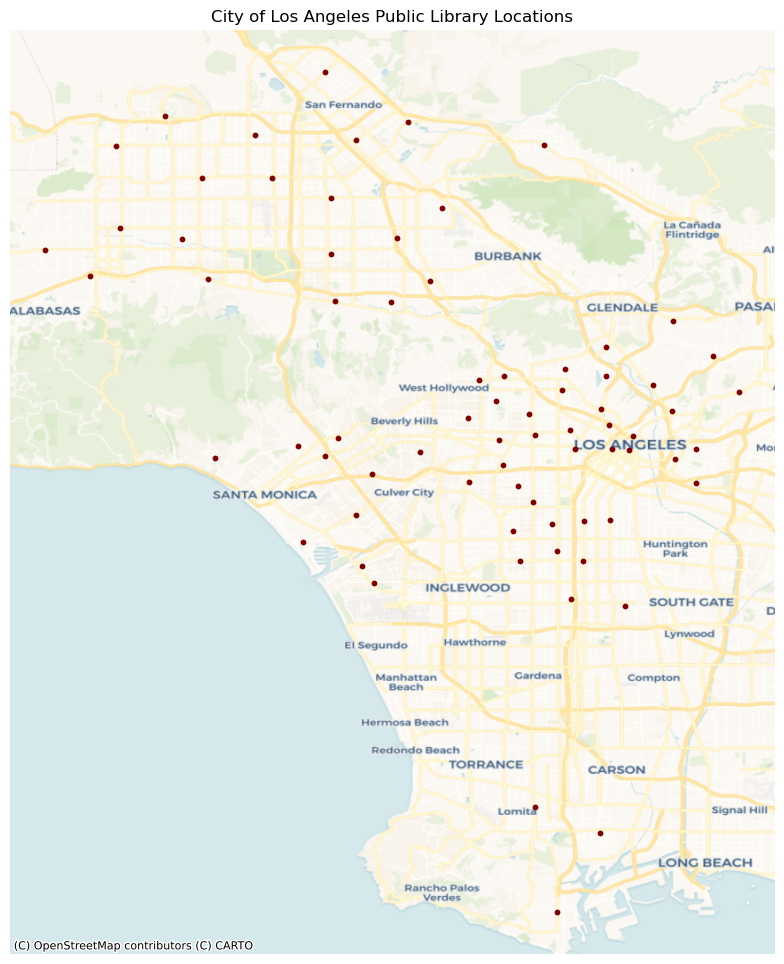

In [14]:
fig, ax = plt.subplots(figsize=(12,12))

geolibraries.plot(ax=ax, 
        marker='o',
        markersize=10,
        color='#800000')

ax.axis('off')

ax.set_title('City of Los Angeles Public Library Locations')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs=4326)